<a href="https://colab.research.google.com/github/ZakiKurdya/Predictive-Maintenance/blob/main/notebooks/descriptive_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science CSCI 3320 Final Project** | Predictive Maintenance Dataset ⚙️

---

© Zaki Kurdya

<a href="https://github.com/ZakiKurdya/Predictive-Maintenance">
<img src="https://cdn-icons-png.flaticon.com/512/25/25231.png" alt="github repository" width=35></a>
<a href="https://colab.research.google.com/drive/1DDEsCd9cCICfcxJQJMmKq9yyMYXAl3et?usp=sharing">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Google_Colaboratory_SVG_Logo.svg/1200px-Google_Colaboratory_SVG_Logo.svg.png" width=65>
</a>

# **Descriptive analytics** 📝

## **Load the cleaned dataset** 🔃

In [6]:
!pip install yellowbrick --quiet

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/ZakiKurdya/Predictive-Maintenance/main/dataset/cleaned_dataset.csv')

In [2]:
df.head(3)

Type  Air temperature  Process temperature  Rotational speed    Torque  \
0   1.0        -0.947770            -0.944225          0.272686  0.235748   
1   0.0        -0.897715            -0.876822         -0.838095  0.631532   
2   0.0        -0.947770            -1.011628         -0.139002  0.982082   

   Tool wear  Machine failure     Power  
0  -1.703463              0.0  0.626122  
1  -1.656112              0.0  0.494763  
2  -1.624544              0.0  1.465392

## **Clustering** 🧩

In [3]:
# features to use for clustering
X = df[["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"]]

* Partitional Clustering, **K-means algorithm**

Elbow method to determine the optimal number (k) of clusters

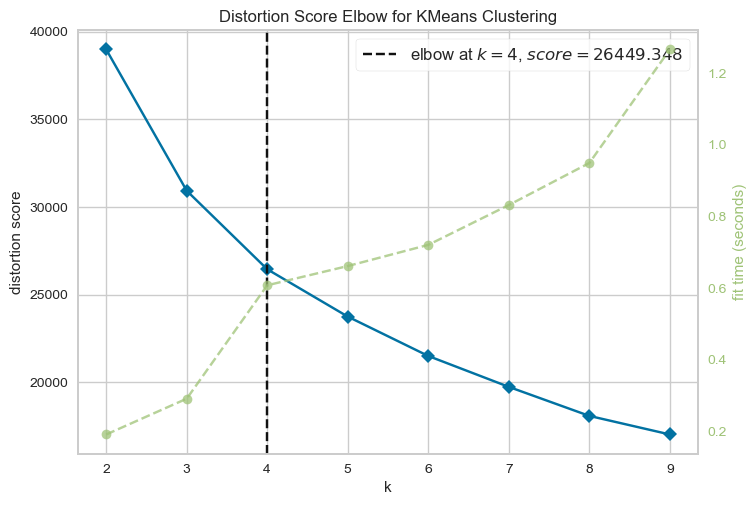

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# K-means clustering
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10)) # it turns out that k = 4 is the optimal number of clusters 

visualizer.fit(X)
visualizer.show()

In [8]:
from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(init="random",  n_clusters=4,
                n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

df["kmeans_cluster"] = kmeans.predict(X)

Plot the results

<Figure size 1000x800 with 0 Axes>

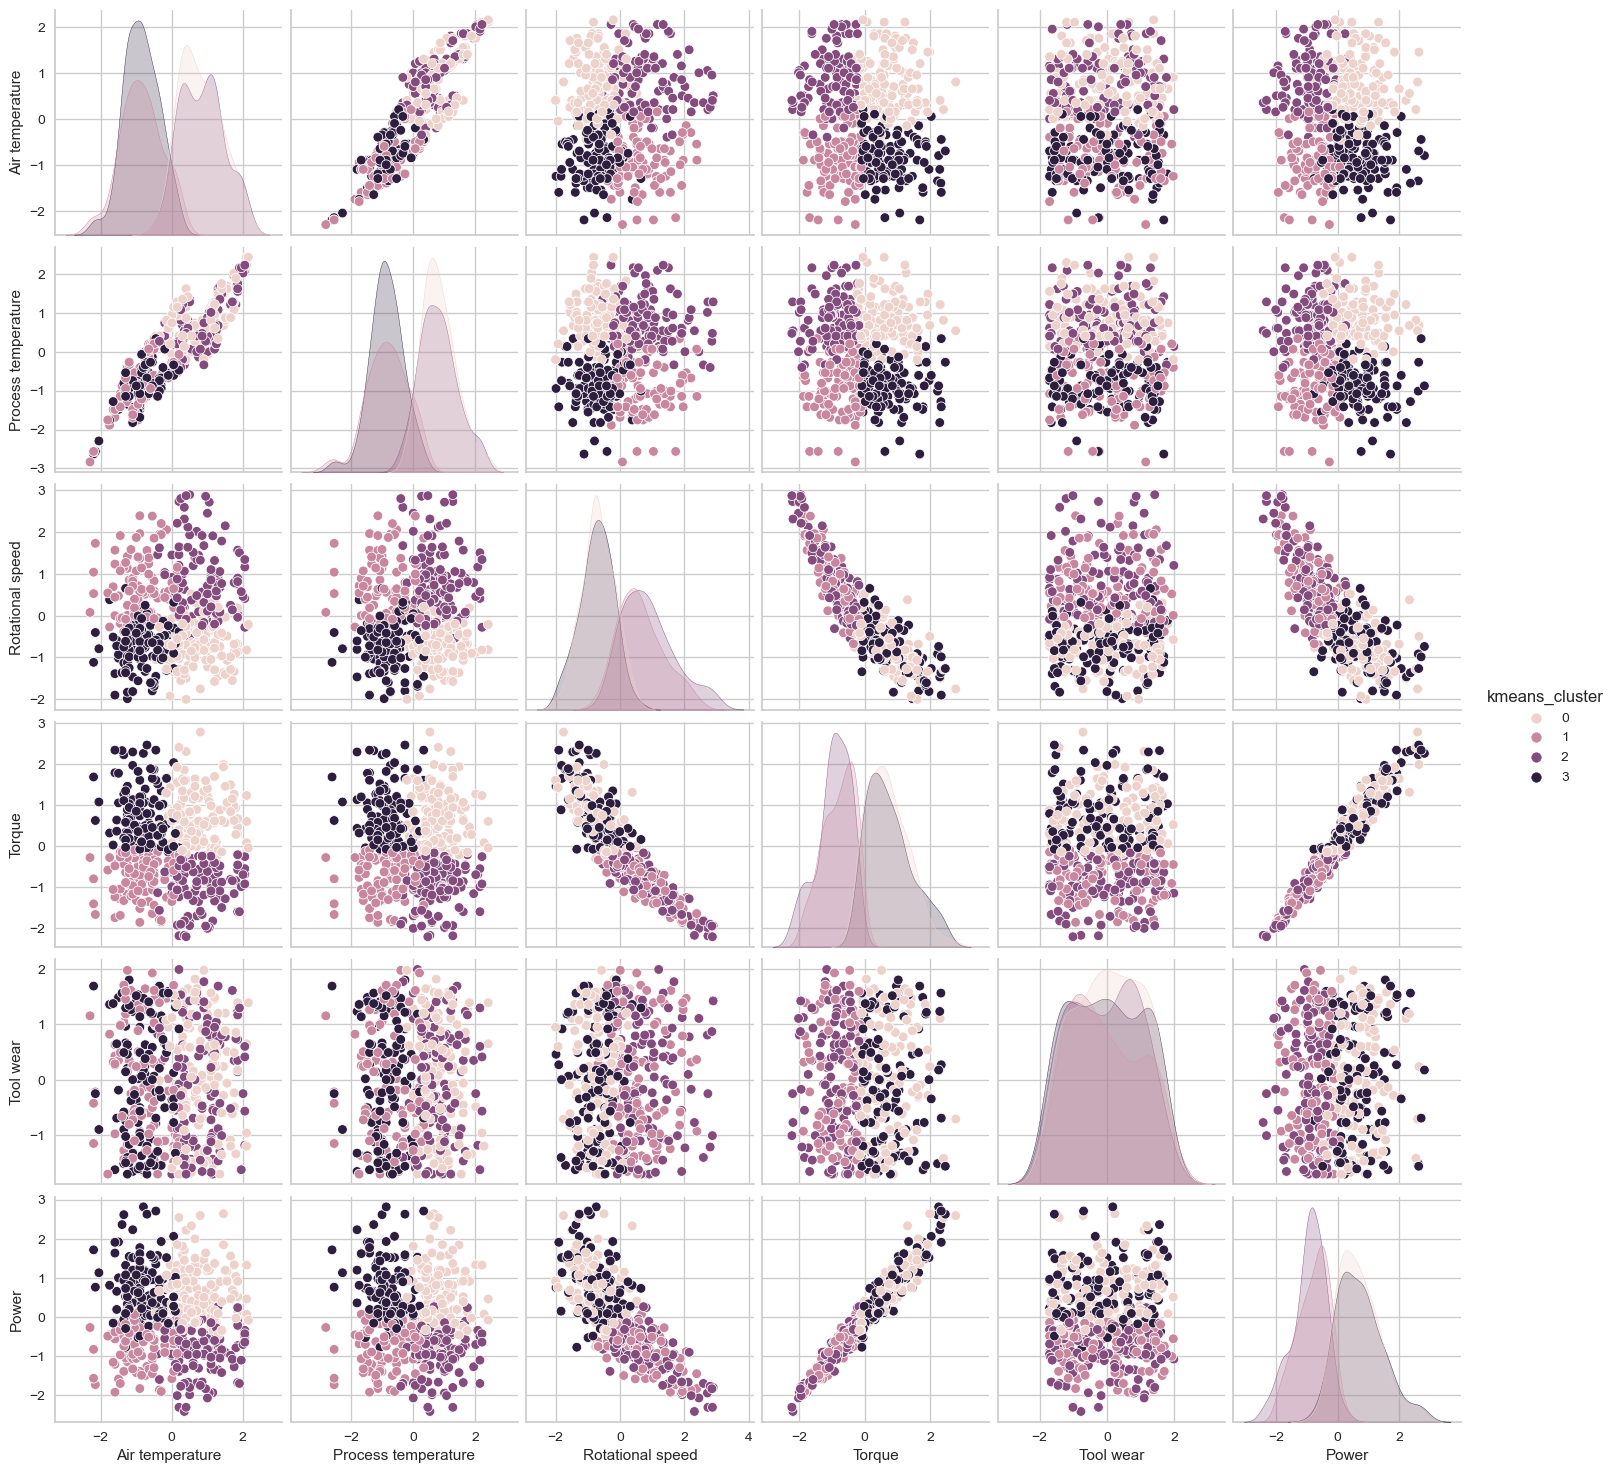

In [9]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="kmeans_cluster", vars=["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"])
plt.show()

Silhouette coefficient for k-means algorithm

In [10]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, kmeans.predict(X))

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.225


* Hierarchical clustering, **Agglomerative**

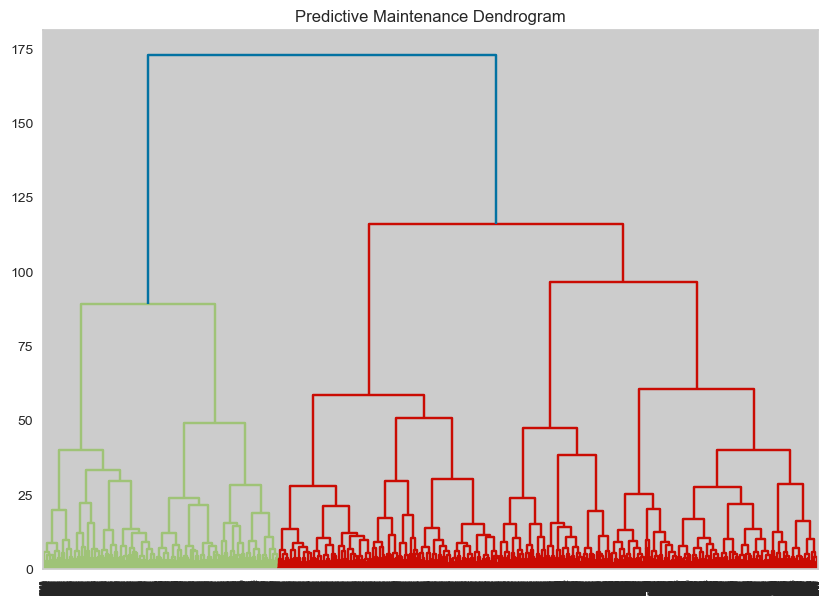

In [11]:
import scipy.cluster.hierarchy as shc

# plot dendogram
plt.figure(figsize=(10, 7))
plt.title("Predictive Maintenance Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = shc.linkage(X, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
df["hierarchical_cluster"] = model.labels_

Plot the results

<Figure size 1000x800 with 0 Axes>

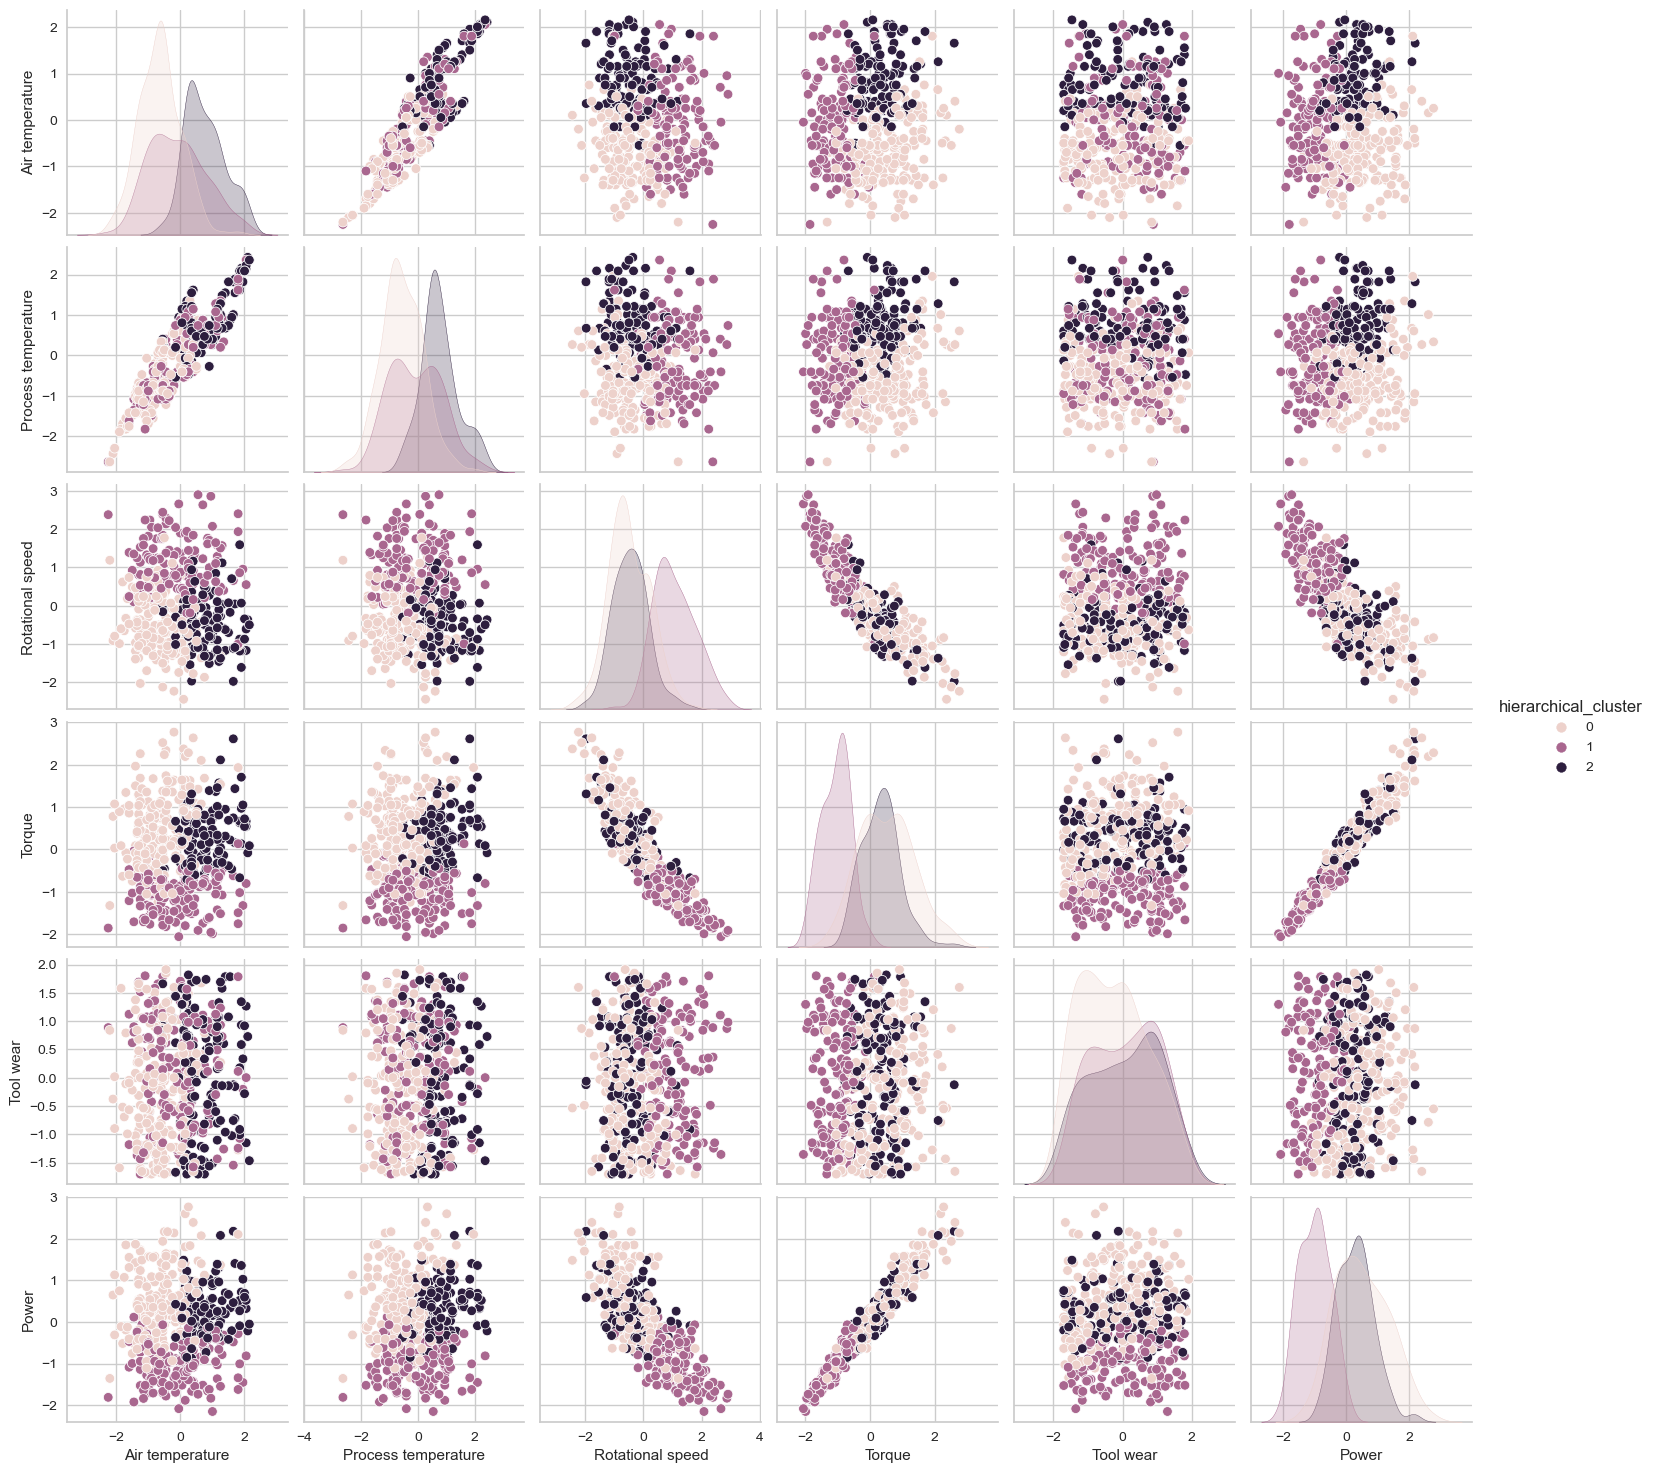

In [13]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="hierarchical_cluster", vars=["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"])
plt.show()

Silhouette coefficient for Agglomerative clustering algorithm

In [14]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, df["hierarchical_cluster"])

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.180


* Density-based clustering, **DBSACN**


Determining EPS and MinPts for DBSACN algorithm

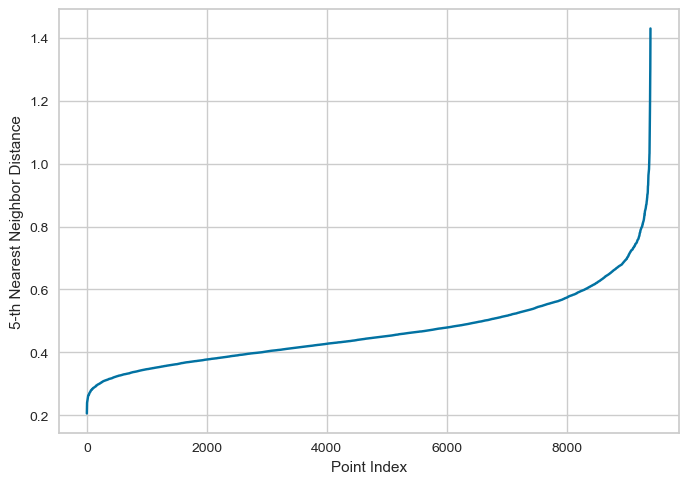

In [15]:
from sklearn.neighbors import NearestNeighbors

k = 5

# create the nearest neighbors model
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)

# get the distances and indices of the kth nearest neighbors for each point
distances, indices = nn.kneighbors(X)

# get the kth nearest neighbor distances for each point
kth_distances = distances[:, k-1]

# sort the kth nearest neighbor distances
kth_distances_sorted = np.sort(kth_distances)

plt.plot(kth_distances_sorted)
plt.xlabel('Point Index')
plt.ylabel('5-th Nearest Neighbor Distance')
plt.show()

In [16]:
from sklearn.cluster import DBSCAN

# create a DBSCAN model
model = DBSCAN(eps=0.7, min_samples=5)
model.fit(X)

# obtain the cluster labels
df['dbscan_cluster'] = model.labels_

In [17]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, df["dbscan_cluster"])

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.292


Plot the results

<Figure size 1000x800 with 0 Axes>

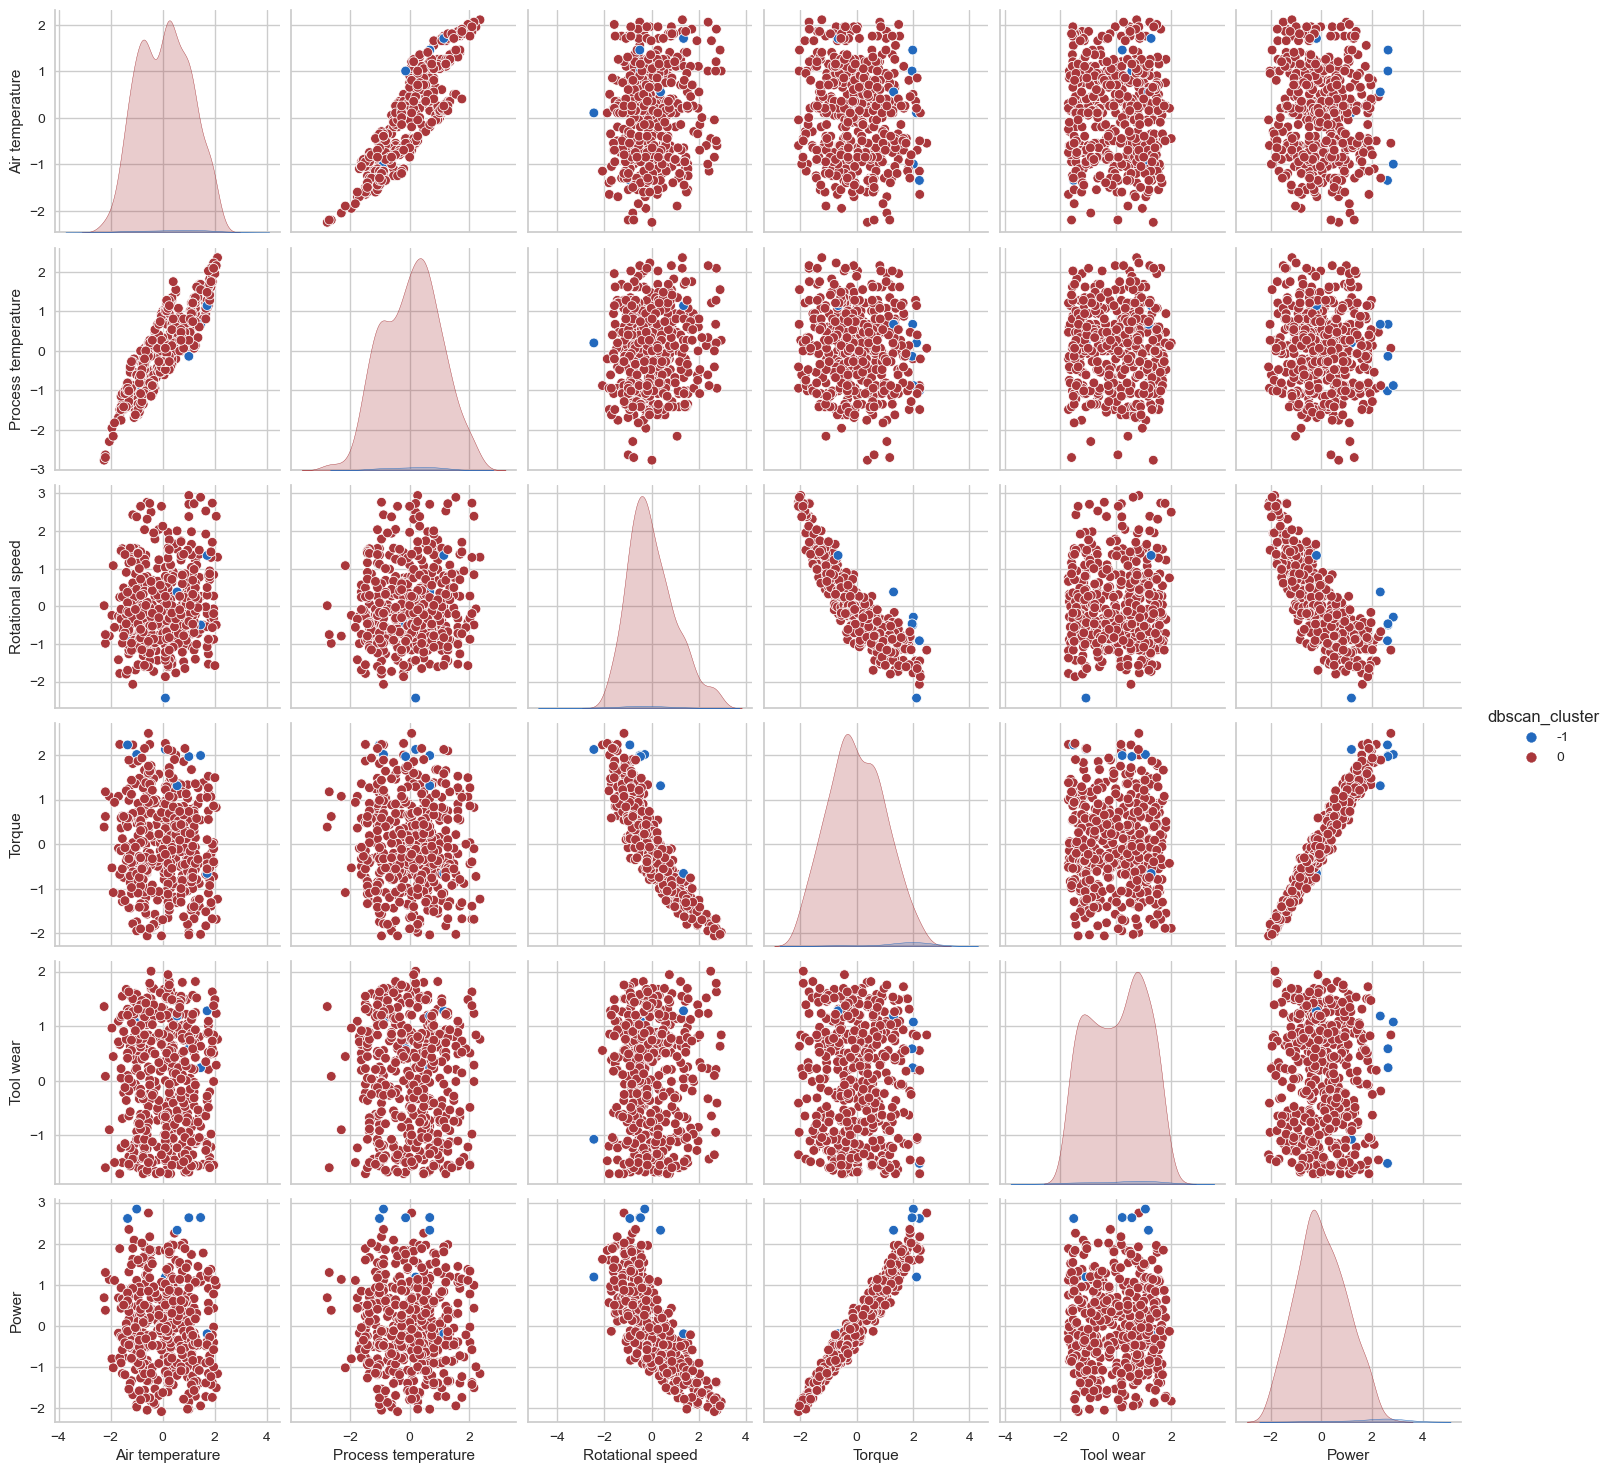

In [20]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="dbscan_cluster", palette="vlag", vars=["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"])
plt.show()